Temperature: 1.0, Autocorrelation time: 3
Temperature: 1.2777777777777777, Autocorrelation time: 4
Temperature: 1.5555555555555556, Autocorrelation time: 3
Temperature: 1.8333333333333335, Autocorrelation time: 7
Temperature: 2.111111111111111, Autocorrelation time: 7
Temperature: 2.388888888888889, Autocorrelation time: 37
Temperature: 2.666666666666667, Autocorrelation time: 9
Temperature: 2.9444444444444446, Autocorrelation time: 4
Temperature: 3.2222222222222223, Autocorrelation time: 3
Temperature: 3.5, Autocorrelation time: 2


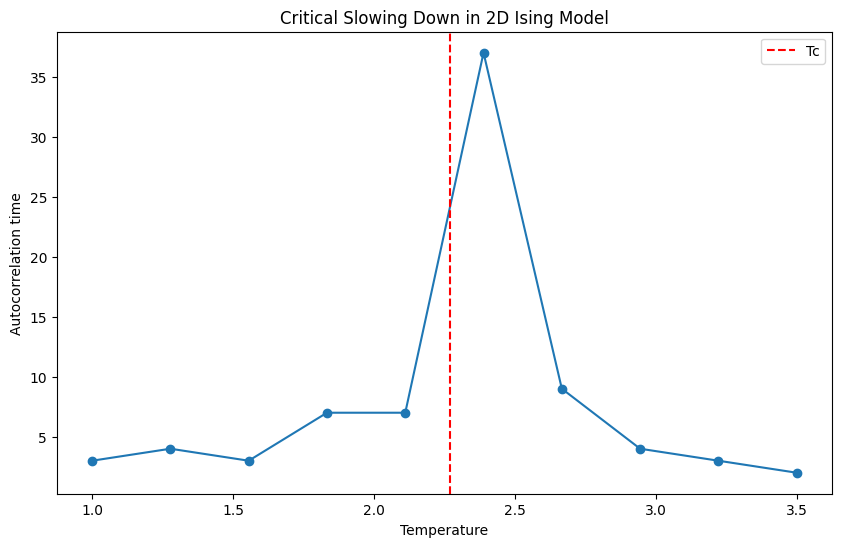

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(N):
    """Initialize a NxN lattice with spins randomly set to -1 or 1."""
    lattice = np.random.choice([-1, 1], size=(N, N))
    return lattice

def compute_energy(lattice):
    """Compute the total energy of the lattice."""
    energy = 0
    N = lattice.shape[0]
    for i in range(N):
        for j in range(N):
            S = lattice[i, j]
            nb = lattice[(i+1)%N, j] + lattice[i, (j+1)%N] + lattice[(i-1)%N, j] + lattice[i, (j-1)%N]
            energy += -S * nb
    return energy / 2  # Each pair counted twice

def metropolis_step(lattice, beta):
    """Perform a single Metropolis step."""
    N = lattice.shape[0]
    for _ in range(N*N):
        i, j = np.random.randint(0, N, size=2)
        S = lattice[i, j]
        nb = lattice[(i+1)%N, j] + lattice[i, (j+1)%N] + lattice[(i-1)%N, j] + lattice[i, (j-1)%N]
        dE = 2 * S * nb
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            lattice[i, j] *= -1
    return lattice

def magnetization(lattice):
    """Compute the magnetization of the lattice."""
    return np.sum(lattice)

def simulate_ising(N, T, n_steps):
    """Simulate the Ising model for n_steps at temperature T."""
    lattice = initialize_lattice(N)
    beta = 1.0 / T
    magnetizations = []
    for step in range(n_steps):
        lattice = metropolis_step(lattice, beta)
        if step % 10 == 0:
            magnetizations.append(magnetization(lattice))
    return np.array(magnetizations)

def autocorrelation_time(magnetizations):
    """Compute the autocorrelation time of the magnetizations."""
    mean_mag = np.mean(magnetizations)
    autocorr = np.correlate(magnetizations - mean_mag, magnetizations - mean_mag, mode='full')
    autocorr = autocorr[autocorr.size//2:]
    autocorr /= autocorr[0]
    return np.where(autocorr < 0.1)[0][0] if np.any(autocorr < 0.1) else len(autocorr)

# Parameters
N = 20  # Lattice size
n_steps = 10000  # Number of simulation steps
temperatures = np.linspace(1.0, 3.5, 10)  # Range of temperatures around Tc

# Simulation
autocorr_times = []
for T in temperatures:
    magnetizations = simulate_ising(N, T, n_steps)
    tau = autocorrelation_time(magnetizations)
    autocorr_times.append(tau)
    print(f'Temperature: {T}, Autocorrelation time: {tau}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(temperatures, autocorr_times, marker='o')
plt.xlabel('Temperature')
plt.ylabel('Autocorrelation time')
plt.title('Critical Slowing Down in 2D Ising Model')
plt.axvline(x=2.27, color='r', linestyle='--', label='Tc')
plt.legend()
plt.show()
